COUNTING ITEM USING AI TECHNIQUE

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [3]:
from ultralytics import YOLO


In [1]:
#DOWNLOADING DATASET

In [4]:
!gdown https://drive.google.com/uc?id=1SRSRjOExDm-Ufhp0_PLRV89XmW1sbemk

Downloading...
From: https://drive.google.com/uc?id=1SRSRjOExDm-Ufhp0_PLRV89XmW1sbemk
To: /content/Screw and Bolt.v3i.yolov8.zip
100% 1.82M/1.82M [00:00<00:00, 193MB/s]


In [7]:
!unzip -q /content/Screw.zip

In [ ]:
#TRAINING

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 102MB/s]
New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vis

In [ ]:
#VALIDATING

/content


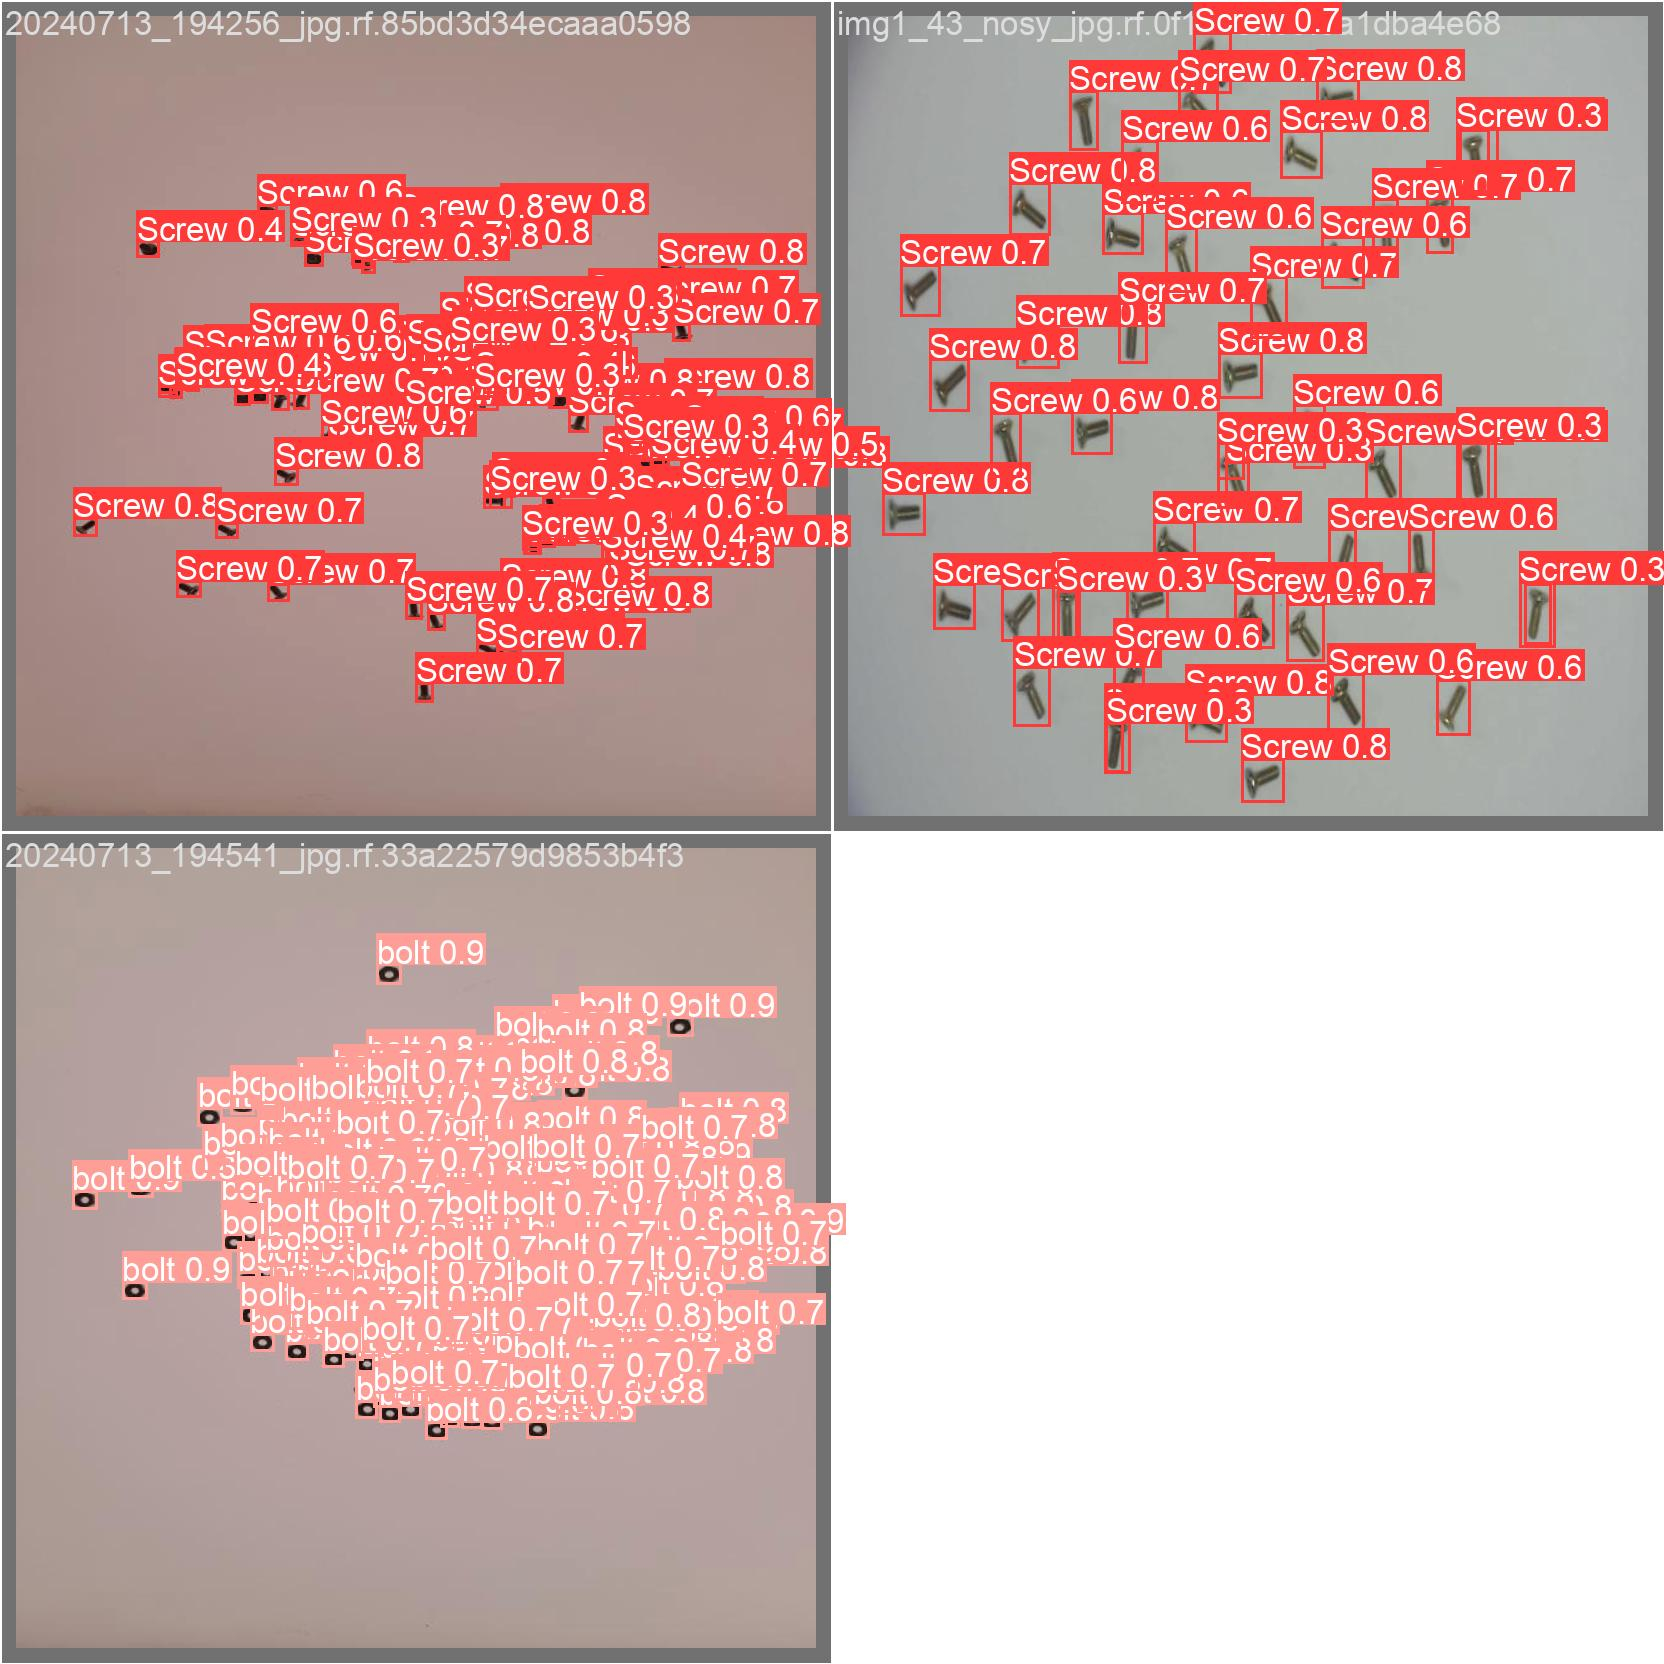

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [1]:
!gdown https://drive.google.com/uc?id=1kpY7c5M6eLR3pvj6jtQN5J3D_XxNBpXv
!unzip -q CountingChallenge-20240731T053433Z-001.zip

Downloading...
From (original): https://drive.google.com/uc?id=1kpY7c5M6eLR3pvj6jtQN5J3D_XxNBpXv
From (redirected): https://drive.google.com/uc?id=1kpY7c5M6eLR3pvj6jtQN5J3D_XxNBpXv&confirm=t&uuid=cc830f27-3336-4ff6-892a-5ab31ccd7de6
To: /content/CountingChallenge-20240731T053433Z-001.zip
100% 29.4M/29.4M [00:00<00:00, 30.3MB/s]


In [8]:
from ultralytics import YOLO
import cv2
import os

model = YOLO('best.pt')
image_folder = '/content/CountingChallenge/ScrewAndBolt_20240713'
output_folder = '/content/output_images'
for image_file in os.listdir(image_folder):
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        results = model(image)
        bolt_count = 0
        screw_count = 0
        image_with_boxes = image.copy()

        for r in results:
            for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
                if model.names[int(cls)] == 'bolt':
                    bolt_count += 1
                    color = (255, 0, 0)
                elif model.names[int(cls)] == 'Screw':
                    screw_count += 1
                    color = (0, 255, 0)
                cv2.rectangle(image_with_boxes,
                              (int(box[0]), int(box[1])),
                              (int(box[2]), int(box[3])),
                              color, 2)
        text_bolt = f"No of Bolts: {bolt_count}"
        text_screw = f"NO of Screws: {screw_count}"

        position_bolt = (50, 150)  # (x, y)
        position_screw = (50, 350)  # (x, y)
        cv2.putText(image_with_boxes, text_bolt, position_bolt,
                    cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0), 5, cv2.LINE_AA)
        cv2.putText(image_with_boxes, text_screw, position_screw,
                    cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5, cv2.LINE_AA)
        print(f"Image name: {image_file}")
        output_image_path = os.path.join(output_folder, f'{os.path.splitext(image_file)[0]}_Image_with_Detections.png')
        cv2.imwrite(output_image_path, image_with_boxes)
        #display(Image(output_image_path))
        print(f"Number of bolts: {bolt_count}")
        print(f"Number of screws: {screw_count}")
        print("-----------------------------")



0: 480x800 43 Screws, 16.7ms
Speed: 3.9ms preprocess, 16.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)
Image name: img4.jpg
Number of bolts: 0
Number of screws: 43
-----------------------------

0: 800x640 182 Screws, 21.2ms
Speed: 4.8ms preprocess, 21.2ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 640)
Image name: 20240713_194200.jpg
Number of bolts: 0
Number of screws: 182
-----------------------------

0: 800x608 300 bolts, 21.3ms
Speed: 5.9ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 608)
Image name: 20240713_194630.jpg
Number of bolts: 300
Number of screws: 0
-----------------------------

0: 800x608 300 bolts, 19.6ms
Speed: 5.4ms preprocess, 19.6ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 608)
Image name: 20240713_194551.jpg
Number of bolts: 300
Number of screws: 0
-----------------------------

0: 800x608 176 Screws, 19.6ms
Speed: 6.2ms preprocess, 19.6ms inference, 1.6ms postprocess

In [6]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [8]:
from IPython.display import Image, display